In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
with open('Reddit_data.json') as file:
    data = json.load(file)

In [3]:
df = pd.DataFrame(data)

In [4]:
df

,post_id,title,author,timestamp,body,score,downs,total_comments,comments
0,1b5fkwx,Set your intention,AutoModerator,2024-03-03 12:00:43,Happy Sunday /r/Anxiety!\n\nIt's everyone's fa...,2,0,3,"[{'comment_id': 'kt5ggty', 'author': 'ladyblac..."
1,1ax3rwf,Monthly Check-In Thread,AutoModerator,2024-02-22 11:00:33,Hello everyone! Welcome to the r/Anxiety month...,3,0,13,"[{'comment_id': 'ks5gisj', 'author': 'pike1296..."
2,1b60jyq,Why do doctors say benzos are so bad but not s...,North-Protection-504,2024-03-04 03:19:49,"So my question is, why do doctors say benzos a...",36,0,48,"[{'comment_id': 'kt90vw3', 'author': 'Cats_and..."
3,1b5quwr,8 hours of survival mode. Its hellish,ThrowRA89992,2024-03-03 20:18:44,I just started a job at a call center for pati...,68,0,27,"[{'comment_id': 'kt7q4xx', 'author': 'Zealousi..."
4,1b5z6b3,My wife gets anxiety attacks and I don't know ...,Rando_Ricketts,2024-03-04 02:12:38,My wife and I have been having marriage proble...,14,0,11,"[{'comment_id': 'kt8odn3', 'author': 'ReadPlay..."
...,...,...,...,...,...,...,...,...,...
991,1b1r3iu,Anxiety makes me feel like half the man I shou...,Ok-Wrangler2324,2024-02-27 23:48:32,So I 22m have lived with anxiety my whole life...,1,0,0,[]
992,1b1r3gr,What are your experiences in taking high doses...,jamsloo,2024-02-27 23:48:27,I want to reduce my clonazepam intake (previou...,1,0,0,[]
993,1b1qz1n,Does anyone else find that their anxiety makes...,Scrambled-Brainz,2024-02-27 23:43:01,I have found that my anxiety (and possibly my ...,1,0,0,[]
994,1b1qvoe,Propanonol,Striking_Lake8348,2024-02-27 23:38:52,For those of you that have or are using this m...,1,0,2,"[{'comment_id': 'ksgj80z', 'author': 'shesmywi..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   post_id         996 non-null    object
 1   title           996 non-null    object
 2   author          992 non-null    object
 3   timestamp       996 non-null    object
 4   body            996 non-null    object
 5   score           996 non-null    int64 
 6   downs           996 non-null    int64 
 7   total_comments  996 non-null    int64 
 8   comments        996 non-null    object
dtypes: int64(3), object(6)
memory usage: 70.2+ KB


In [6]:
df.isna().sum()

post_id           0
title             0
author            4
timestamp         0
body              0
score             0
downs             0
total_comments    0
comments          0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
# Distribution of post titles and selftexts lengths
df['title_length'] = df['title'].apply(len)
df['selftext_length'] = df['body'].apply(len)

In [9]:
df.head()

,post_id,title,author,timestamp,body,score,downs,total_comments,comments,title_length,selftext_length
0,1b5fkwx,Set your intention,AutoModerator,2024-03-03 12:00:43,Happy Sunday /r/Anxiety!\n\nIt's everyone's fa...,2,0,3,"[{'comment_id': 'kt5ggty', 'author': 'ladyblac...",18,253
1,1ax3rwf,Monthly Check-In Thread,AutoModerator,2024-02-22 11:00:33,Hello everyone! Welcome to the r/Anxiety month...,3,0,13,"[{'comment_id': 'ks5gisj', 'author': 'pike1296...",23,1175
2,1b60jyq,Why do doctors say benzos are so bad but not s...,North-Protection-504,2024-03-04 03:19:49,"So my question is, why do doctors say benzos a...",36,0,48,"[{'comment_id': 'kt90vw3', 'author': 'Cats_and...",51,262
3,1b5quwr,8 hours of survival mode. Its hellish,ThrowRA89992,2024-03-03 20:18:44,I just started a job at a call center for pati...,68,0,27,"[{'comment_id': 'kt7q4xx', 'author': 'Zealousi...",37,767
4,1b5z6b3,My wife gets anxiety attacks and I don't know ...,Rando_Ricketts,2024-03-04 02:12:38,My wife and I have been having marriage proble...,14,0,11,"[{'comment_id': 'kt8odn3', 'author': 'ReadPlay...",61,529


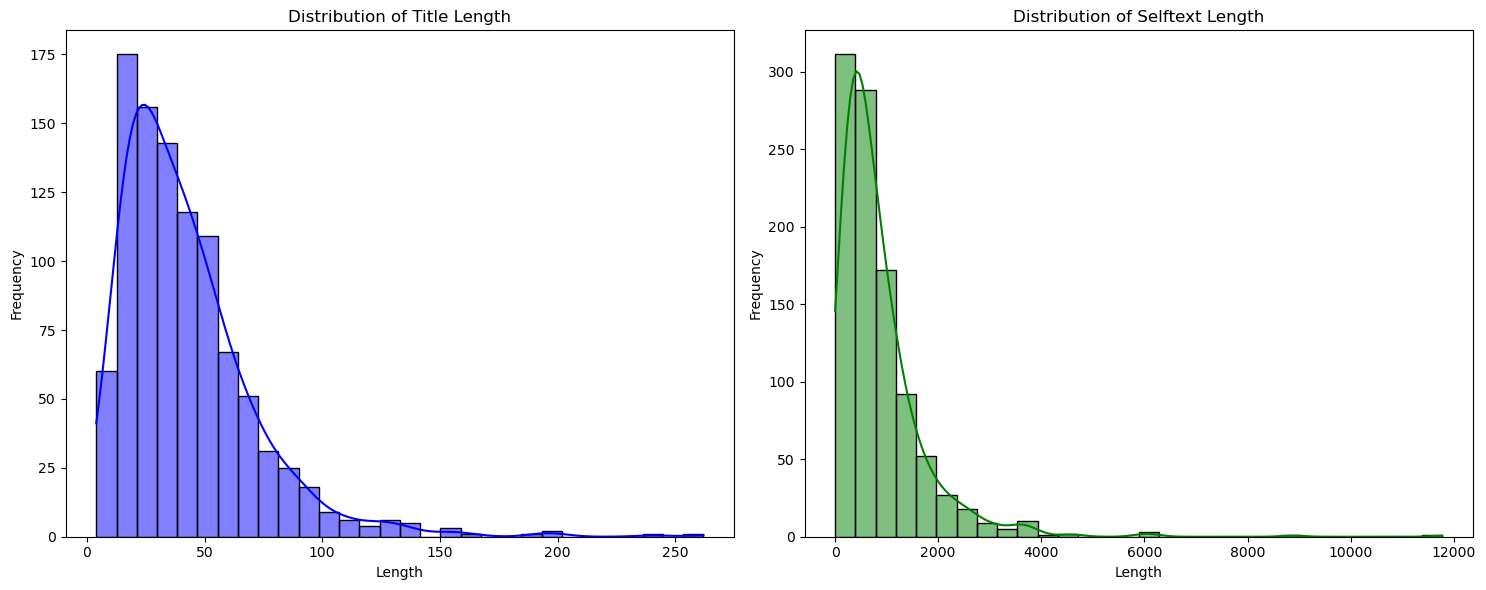

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the distribution of title length
sns.histplot(df['title_length'], bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribution of Title Length')
axes[0].set_xlabel('Length')
axes[0].set_ylabel('Frequency')

# Plot the distribution of selftext length
sns.histplot(df['selftext_length'], bins=30, kde=True, color='green', ax=axes[1])
axes[1].set_title('Distribution of Selftext Length')
axes[1].set_xlabel('Length')
axes[1].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

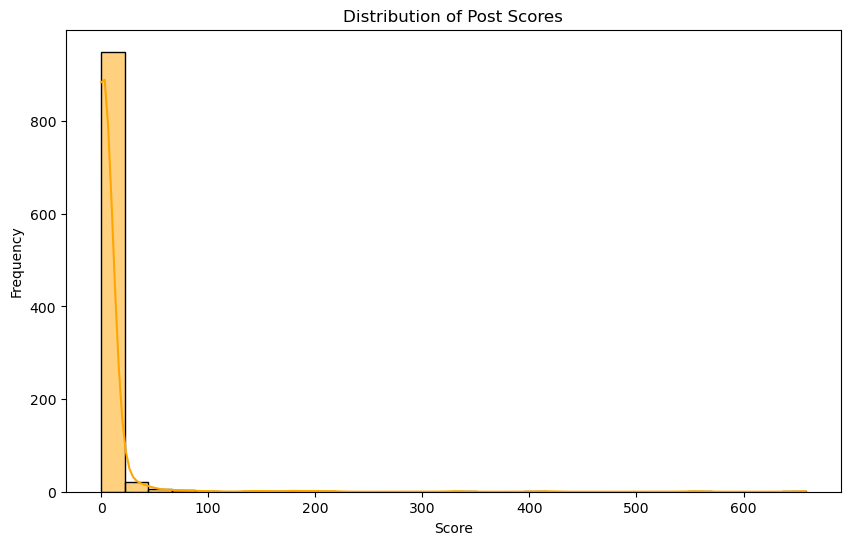

In [11]:
# Distribution of post scores
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=30, kde=True, color='orange')
plt.title('Distribution of Post Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [12]:
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.date

In [13]:
df

,post_id,title,author,timestamp,body,score,downs,total_comments,comments,title_length,selftext_length
0,1b5fkwx,Set your intention,AutoModerator,2024-03-03,Happy Sunday /r/Anxiety!\n\nIt's everyone's fa...,2,0,3,"[{'comment_id': 'kt5ggty', 'author': 'ladyblac...",18,253
1,1ax3rwf,Monthly Check-In Thread,AutoModerator,2024-02-22,Hello everyone! Welcome to the r/Anxiety month...,3,0,13,"[{'comment_id': 'ks5gisj', 'author': 'pike1296...",23,1175
2,1b60jyq,Why do doctors say benzos are so bad but not s...,North-Protection-504,2024-03-04,"So my question is, why do doctors say benzos a...",36,0,48,"[{'comment_id': 'kt90vw3', 'author': 'Cats_and...",51,262
3,1b5quwr,8 hours of survival mode. Its hellish,ThrowRA89992,2024-03-03,I just started a job at a call center for pati...,68,0,27,"[{'comment_id': 'kt7q4xx', 'author': 'Zealousi...",37,767
4,1b5z6b3,My wife gets anxiety attacks and I don't know ...,Rando_Ricketts,2024-03-04,My wife and I have been having marriage proble...,14,0,11,"[{'comment_id': 'kt8odn3', 'author': 'ReadPlay...",61,529
...,...,...,...,...,...,...,...,...,...,...,...
991,1b1r3iu,Anxiety makes me feel like half the man I shou...,Ok-Wrangler2324,2024-02-27,So I 22m have lived with anxiety my whole life...,1,0,0,[],51,1291
992,1b1r3gr,What are your experiences in taking high doses...,jamsloo,2024-02-27,I want to reduce my clonazepam intake (previou...,1,0,0,[],75,587
993,1b1qz1n,Does anyone else find that their anxiety makes...,Scrambled-Brainz,2024-02-27,I have found that my anxiety (and possibly my ...,1,0,0,[],95,3299
994,1b1qvoe,Propanonol,Striking_Lake8348,2024-02-27,For those of you that have or are using this m...,1,0,2,"[{'comment_id': 'ksgj80z', 'author': 'shesmywi...",11,286


In [14]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
stop_words = set(stopwords.words('english'))

In [17]:

# Modify your function to use stop_words
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Convert to lowercase
    tokens = [word.lower() for word in tokens]
    # Removing Punctuation
    table = str.maketrans('', '', string.punctuation)
    stripped = [word.translate(table) for word in tokens]
    # Removing Stopwords
    words = [word for word in stripped if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    # Join the lemmatized words back into a string
    processed_text = ' '.join(lemmatized_words)
    return processed_text

In [18]:
df['title'] = df['title'].apply(preprocess_text)
df['body'] = df['body'].apply(preprocess_text)

# Preprocess comments and replies
for post_comments in df['comments']:
    for comment in post_comments:
        comment['body'] = preprocess_text(comment['body'])
        # Preprocess replies
        for reply in comment['replies']:
            reply['body'] = preprocess_text(reply['body'])

# Save the preprocessed DataFrame to a new JSON file
preprocessed_file_path = "P:/omdena/reddit_data_preprocessed.json"
df.to_json(preprocessed_file_path, orient='records')

print("Preprocessing completed and saved to:", preprocessed_file_path)

Preprocessing completed and saved to: P:/omdena/reddit_data_preprocessed.json


In [19]:
df2 = pd.read_json('reddit_data_preprocessed.json')

In [20]:
df2

,post_id,title,author,timestamp,body,score,downs,total_comments,comments,title_length,selftext_length
0,1b5fkwx,set intention,AutoModerator,2024-03-03,happy sunday ranxiety everyone favorite day w...,2,0,3,"[{'comment_id': 'kt5ggty', 'author': 'ladyblac...",18,253
1,1ax3rwf,monthly checkin thread,AutoModerator,2024-02-22,hello everyone welcome ranxiety monthly check...,3,0,13,"[{'comment_id': 'ks5gisj', 'author': 'pike1296...",23,1175
2,1b60jyq,doctor say benzos bad ssri,North-Protection-504,2024-03-04,question doctor say benzos soo bad act like s...,36,0,48,"[{'comment_id': 'kt90vw3', 'author': 'Cats_and...",51,262
3,1b5quwr,8 hour survival mode hellish,ThrowRA89992,2024-03-03,started job call center patient guy freaking...,68,0,27,"[{'comment_id': 'kt7q4xx', 'author': 'Zealousi...",37,767
4,1b5z6b3,wife get anxiety attack nt know help,Rando_Ricketts,2024-03-04,wife marriage problem seeing marriage counsel...,14,0,11,"[{'comment_id': 'kt8odn3', 'author': 'ReadPlay...",61,529
...,...,...,...,...,...,...,...,...,...,...,...
987,1b1r3iu,anxiety make feel like half man,Ok-Wrangler2324,2024-02-27,22m lived anxiety whole life afraid talk crus...,1,0,0,[],51,1291
988,1b1r3gr,experience taking high dos pristiqdesvenlaflax...,jamsloo,2024-02-27,want reduce clonazepam intake previously took...,1,0,0,[],75,587
989,1b1qz1n,anyone else find anxiety make overly sensitive...,Scrambled-Brainz,2024-02-27,found anxiety possibly adhd well working anx...,1,0,0,[],95,3299
990,1b1qvoe,propanonol,Striking_Lake8348,2024-02-27,using medication anxiety help woosh adrenal...,1,0,2,"[{'comment_id': 'ksgj80z', 'author': 'shesmywi...",11,286


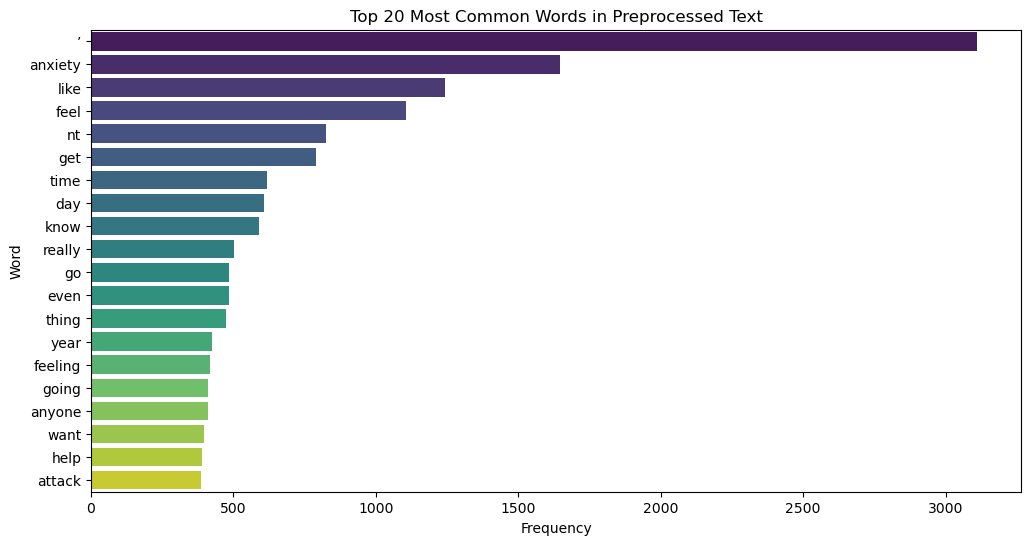

In [21]:
from collections import Counter
# Combine all preprocessed text into a single string
all_text = ' '.join(df2['title'].values + ' ' + df2['body'].values)

# Tokenize the combined text
tokens = word_tokenize(all_text)

# Count the frequency of each word
word_freq = Counter(tokens)

# Convert the word frequency to a DataFrame
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot the top 20 most common words
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df.head(20), palette='viridis')
plt.title('Top 20 Most Common Words in Preprocessed Text')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()